# Data Transformation

## Importing Raw Dataset

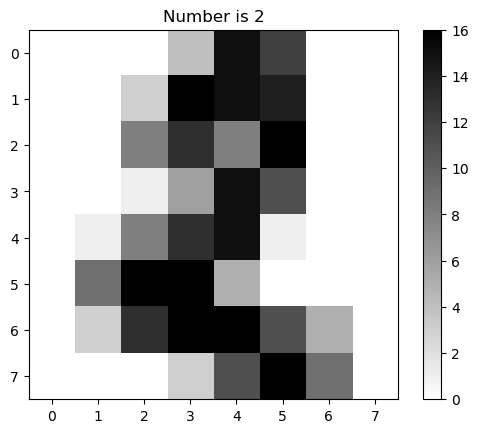

In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets
import torch

digits = datasets.load_digits()

images = torch.tensor(digits.images, dtype=torch.float32)
targets = torch.tensor(digits.target, dtype=torch.int64)

plt.imshow(images[2].numpy(), cmap=plt.cm.gray_r, interpolation="nearest")
plt.title(f'Number is {targets[2].numpy()}')
plt.colorbar()
plt.show()

## Encoding The Targets

In [19]:
import torch.nn.functional as torch_function

encoded_targets = torch_function.one_hot(targets, num_classes=10).to(float)
encoded_targets.shape

torch.Size([1797, 10])

## Flattening The Images

In [20]:
flattened_images = images.reshape(-1, 8**2)
flattened_images.shape

torch.Size([1797, 64])

## Splitting Dataset

In [21]:
from sklearn.model_selection import train_test_split

images_train, images_test, targets_train, targets_test = train_test_split(
    flattened_images, encoded_targets, test_size=0.2, random_state=42
)

## Exporting Transformed Dataset

In [22]:
torch.save((images_train, targets_train), '../../../datasets/processed/train_data.pt')
torch.save((images_test, targets_test), '../../../datasets/processed/test_data.pt')